<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование данных" data-toc-modified-id="Исследование данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Статистический анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Исследование данных

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
from plotly import graph_objects as go
import plotly.express as px 
import scipy.stats as stats
#matplotlib.use('TkAgg')


import warnings
warnings.filterwarnings('ignore')

# задаём настройки отображения
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', None)

In [2]:
# импортируем данные
data = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')

# универсальная функция для вывода информации о базе данных
def primary_analysis(df):
    # информация о датафрейме, количество столбцов и строк, типы данных, названия столбцов и первые 10 строк ДФ.
    df.info()
    print('*'*50)
    display(df.head(10))
    print('*'*50)
    print("Количество строк и стобцов: ",df.shape)
    print('*'*50)
    display(df.describe(include='all'))
    print('*'*50)
    print('Наименование столбцов:')
    display(df.columns)
    print('*'*50)
    # максимальные и минимальные значения
    print('Максимальные значения столбцов:')
    display(df.max())
    print('*'*50)
    print('Минимальные значения столбцов:')
    display(df.min())
    print('*'*50)
    # уникальные значения по возрастанию встречаемости
    print('Значения столбцов по возрастанию встречаемости:')
    for value in df:
        print(df[value].value_counts().sort_values())
        print('*'*5)
    print()
    # проверка на полные дубликаты
    print('*'*50)
    print('Количество повторов:', df.duplicated().sum())
primary_analysis(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637795729492245130,""session_length"":705.8807,""revenue"":0.000510313,""ads_ltv"":0.487876676518837,""ecpm_sma"":0.511508107185364,""normalized_ecpm_sma"":0.511508107185364,""value"":0.000510313,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""ca-app-pub-7511632782617496/8825263691"",""creativeId"":""CJ3XirfD5vUCFYPnKAUdG3MOYQ""}",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637795729659949790,""session_length"":722.6512,""revenue"":0.000510313,""ads_ltv"":0.488386989518837,""ecpm_sma"":0.511388599872589,""normalized_ecpm_sma"":0.511388599872589,""value"":0.000510313,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""ca-app-pub-7511632782617496/8825263691"",""creativeId"":""CNa-lL_D5vUCFZrpKAUdU2QBDQ""}",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637796515863735930,""session_length"":431.8129,""revenue"":0.0023861625,""ads_ltv"":0.67847875732725,""ecpm_sma"":0.928597450256348,""normalized_ecpm_sma"":0.928597450256348,""value"":0.0023861625,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""APPLOVIN_EXCHANGE"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""banner_regular"",""creativeId"":""pandora-58""}",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""view_index"":1,""session_view_index"":1,""cur_ticks"":637797353426827330,""session_length"":125.9496,""revenue"":0.0138937835693359,""ads_ltv"":0.0138937835693359,""ecpm_sma"":13.7826328277588,""normalized_ecpm_sma"":13.8937835693359,""value"":0.0138937835693359,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""AppLovin"",""ad_unit_id"":""3ab7705b07ebb75f"",""ad_network_placement"":""inter_regular"",""creativeId"":""13045364""}",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637797357392197840,""session_length"":12.71129,""revenue"":0.00682757,""ads_ltv"":0.0605709444258423,""ecpm_sma"":1.6602817773819,""normalized_ecpm_sma"":1.6602817773819,""value"":0.00682757,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""ca-app-pub-7511632782617496/6197324251"",""creativeId"":""CMTi5e-h6_UCFUdVwQodt9EIMw""}",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN
5,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637797357542806540,""session_length"":27.753,""revenue"":0.000494196,""ads_ltv"":0.0610651404258423,""ecpm_sma"":1.54367327690125,""normalized_ecpm_sma"":1.54367327690125,""value"":0.000494196,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6

**************************************************
Количество строк и стобцов:  (860079, 16)
**************************************************


,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
count,860065,860079,860079,860079,860079,860079,860079,860079,860079,"860,079.0000",860079,"860,079.0000",860079,841200,860079,536371
unique,4226,11,34,284,2,9,1,860076,322812,NaN,180237,NaN,3,92,1,920
top,JL5pmKYe8g7,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""lose_offer_attempt_int"",""view_index"":86,""session_view_index"":6,""cur_ticks"":637795152685579760,""session_length"":1087.268,""revenue"":0.00564017057418823,""ads_ltv"":1.70973743083661,""ecpm_sma"":7.90798664093018,""normalized_ecpm_sma"":8.30670833587646,""value"":0.00564017057418823,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""AppLovin"",""ad_unit_id"":""3ab7705b07ebb75f"",""ad_network_placement"":""inter_regular"",""creativeId"":""13600724""}",2022-02-06 19:00:31,NaN,2022-02-06 19:00:32,NaN,wifi,Verizon,US,New York
freq,8486,407587,651633,54845,835667,856257,860079,2,555,NaN,651,NaN,624421,288720,860079,17584
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,644,087,764.4549",NaN,"1,644,088,443.3855",NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"105,860.3940",NaN,"105,592.8292",NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,643,467,352.0000",NaN,"1,643,835,602.0000",NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,644,017,239.0000",NaN,"1,644,017,747.0000",NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,644,102,151.0000",NaN,"1,644,102,530.0000",NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,644,176,802.0000",NaN,"1,644,177,275.0000",NaN,NaN,NaN,NaN


**************************************************
Наименование столбцов:


Index(['profile_id', 'os_version', 'device_manufacturer', 'device_model',
       'device_type', 'device_locale', 'event_name', 'event_json',
       'event_datetime', 'event_timestamp', 'event_receive_datetime',
       'event_receive_timestamp', 'connection_type', 'operator_name',
       'country_iso_code', 'city'],
      dtype='object')

**************************************************
Максимальные значения столбцов:


os_version                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     9
device_manufacturer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

**************************************************
Минимальные значения столбцов:


os_version                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      10
device_manufacturer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

**************************************************
Значения столбцов по возрастанию встречаемости:
JLgvPJq1sOV       1
JLqfpsnL7Pd       1
JLhSTFiw3ue       1
JLrUVh0RVqh       1
JLgvGSgmKmg       1
               ... 
JLxjvw18Qg0    4934
JLnrqVfS2Fn    5046
JL4p0t068V1    5646
JLTfZhBE0e3    6571
JL5pmKYe8g7    8486
Name: profile_id, Length: 4226, dtype: int64
*****
6.0.1       704
5.0.2       709
7.1.1      1342
7.1.2      1811
7.0        4057
8.0.0      8016
8.1.0      9249
9         66662
10       150871
11       209071
12       407587
Name: os_version, dtype: int64
*****
AEEZO                    3
Razer                    5
Yulong                   5
Huawei                   9
deejoy                  12
POCO                    17
Ulefone                 32
Asus                    42
Onn (Walmart)           45
Schok                   99
Redmi                  125
AT&T                   133
Zte                    144
FIH                    169
Maxwest                182
Wiko        

EE                              1
Freedom                         1
GCI Communication Corp.         1
Spectrum Mobile                 1
Telrite/Pure Talk               1
                            ...  
U.S. Cellular               29631
Verizon                     43935
T-Mobile                   141402
AT&T                       148377
Verizon                    288720
Name: operator_name, Length: 92, dtype: int64
*****
US    860079
Name: country_iso_code, dtype: int64
*****
Swedesboro           1
Beaumont             1
Ephrata              1
Elizabethtown        1
Kokomo               1
                 ...  
Charlotte         9750
Springfield      10135
Houston          10137
Minneapolis      12980
New York         17584
Name: city, Length: 920, dtype: int64
*****

**************************************************
Количество повторов: 0


Выведем отдельно те данные, что получили в прошлом пункте.


In [3]:
# количество уникальных пользователей
print('Количество уникальных пользователей:',len(data['profile_id'].unique()))
print()

# количество уникальных событий
print('Количество уникальных событий:',len(data['event_name'].unique()))
print()

# количество событий
print('Количество событий:',len(data['event_name']))
print()

# количество событий на пользователя.
print('Среднее колличество событий на пользователя:',data.groupby('profile_id').agg({'event_name':'count'}).mean().values)
print()

# первая и последняя дата исследования.
print('Первый момент исследования:',data['event_datetime'].min())
print('Последний момент исследования:',data['event_datetime'].max())
print()

# первая и последняя дата исследования по факту получения информации сервером.
print('Время начала исследования по данным сервера:',data['event_receive_datetime'].min())
print('Время конца исследования по данным сервера:',data['event_receive_datetime'].max())


Количество уникальных пользователей: 4227

Количество уникальных событий: 1

Количество событий: 860079

Среднее колличество событий на пользователя: [203.51751065]

Первый момент исследования: 2022-01-29 17:42:32
Последний момент исследования: 2022-02-07 23:59:59

Время начала исследования по данным сервера: 2022-02-03 00:00:02
Время конца исследования по данным сервера: 2022-02-07 23:59:59


Пока что по данным кажется, что есть большой лаг между фактом произошедшего события и получением информации об этом сервером. Возможно нам нужно пересмотреть дату начала исследования 2022-01-29 и заменить на 2022-02-03.

Чтобы в этом убедиться, посмотрим на график распределения событий по времени в следующем пункте.

### Краткий вывод

При первичном осмотре данных сразу видно, что:
- Самая популярная фирма у пользователей приложения это - `Samsung`;
- Уже будет не удивительно, но в топе модели телефонов `Galaxy`; 
- Самый популярный тип девайса `телефон`, а не планшет. Значит наша игра хорошо под него оптимизирована;
- Хоть по данным сказано, что пользователи из США, но попало и маленькое количество из других стран, использующие иные настройки языка. Возможно это туристы или недавние мигранты.
- В основном игроки подключаются через `wi-fi`. Из этого можно предположить, что приложение достаточно трафикоёмкое,   чтобы играть в неё с мобильного интернета. Кроме того, на выбор вай-фая может влиять время использования приложения, так как довольно часто в телефоне настроено автоматическое переключение на доверительную сеть с мобильного интернета. Скорее всего игроки подключаются именно через домашний вай-фай или в ожидании в каких-нибудь общественных точках, где есть доступ к бесплатному вай-фай соединению. 
- Есть также лидеры среди мобильных операторов (`Verizon`), городов (`New York`), версий ОС (`12`). 

Говоря о содержании датасета, важно отметить также присутствие пропусков в колонках `profile_id, operator_name, city`, а также, (что хорошо!) отсутствие полных дубликатов.

Также заметно, что данные не выравнены по одному регистру, что по сути не является ошибкой, но может привести к её появлению. При отсутствии четкого регламента занесения данных высока вероятность появления дубликатов. 


## Предобработка данных

Начнем с того, что поменяем тип данных в столбцах на более удобный для обращения.

In [4]:
data['event_datetime'] = pd.to_datetime(data['event_datetime'])

data['event_receive_datetime'] = pd.to_datetime(data['event_receive_datetime'])

Уберём опечатку в наименовании оператора.

In [5]:
data['operator_name'] = data['operator_name'].str.replace('Verizon ', 'Verizon')

Добавим на будущее столбец с `часом исследования`.

In [6]:
data['hour'] = data['event_datetime'].dt.hour

#### Посмотрим есть ли проблема с выгруженными данными.

Столбцы `event_datetime` и `event_receive_datetime` могут не совпадать из-за задержки передачи информации серверу.

Также к датафрейму может подтянуться информация за период, когда не было действий пользователей.


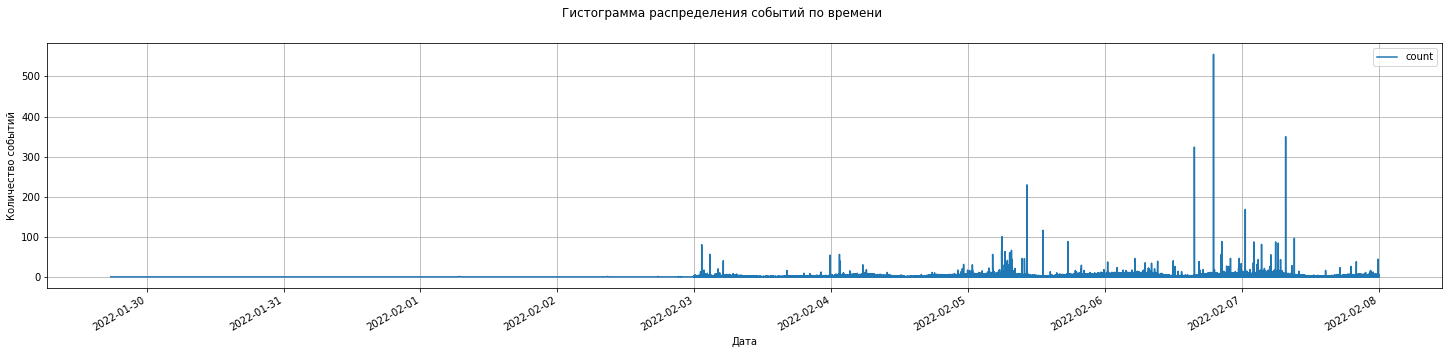

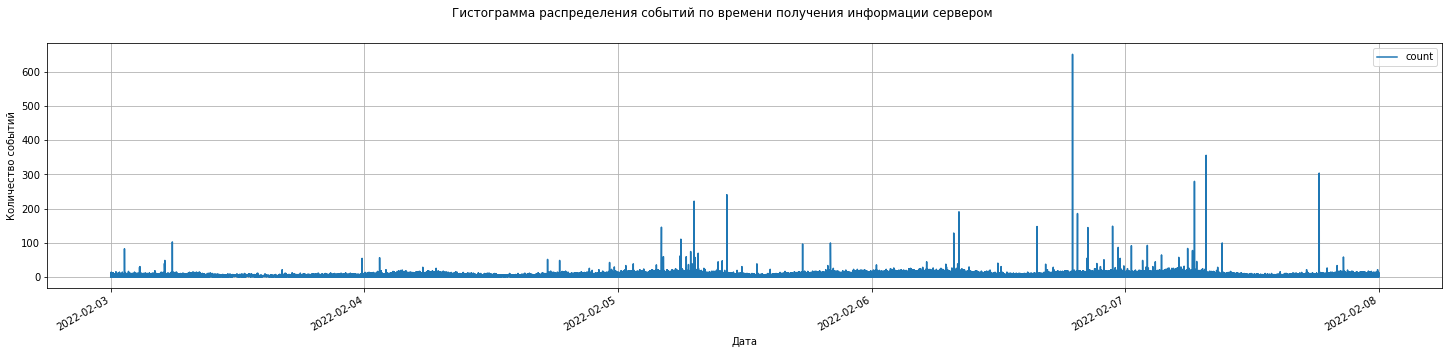

In [7]:
# сведем таблицы для графиков распределения событий по времени
pivot_datetime =  data.groupby('event_datetime').agg({'event_name':'count'})\
    .rename(columns={'event_name':'count'}).reset_index()    

pivot_receive = data.groupby('event_receive_datetime').agg({'event_name':'count'})\
    .rename(columns={'event_name':'count'}).reset_index()    

# построим графики
pivot_datetime.pivot_table(index='event_datetime', values='count', aggfunc='mean').plot(grid=True, figsize=(25, 5))
plt.xlabel('Дата'), plt.ylabel('Количество событий')
plt.suptitle('Гистограмма распределения событий по времени')
plt.show()

pivot_receive.pivot_table(index='event_receive_datetime', values='count', aggfunc='mean').plot(grid=True, figsize=(25, 5))
plt.xlabel('Дата'), plt.ylabel('Количество событий')
plt.suptitle('Гистограмма распределения событий по времени получения информации сервером')
plt.show()


Как видно по гистограммам, с 29.01 по 03.02 на графике `event_datetime` не отображаются совершенные события. 

Таким образом дата начала исследования <strong>2022-02-03  </strong> из прошлого пункта подтвердилась и по графикам.




In [8]:
# сделаем срез по нашей дате
start_date = pd.to_datetime("2022-02-03")
new_data = data[data['event_datetime']>=start_date]

# посмотрим сколько осталось пользователей в отфильтрованном ДФ.
print('Осталось пользователей:',round(new_data['profile_id'].nunique() / data['profile_id'].nunique(),3),'%')
print()

# посмотрим сколько осталось событий в отфильтрованном ДФ.
print('Осталось событий:',round(len(new_data['event_name']) / len(data['event_name']),3),'%')

Осталось пользователей: 0.995 %

Осталось событий: 0.999 %


После ограничения периода исследования все ещё остается большое количество пропусков. Часть из них, затрагивающую наименования пользователей мы можем удалить.


Нам не известно являются ли пропущенные `profile_id` постоянным пользователями или новыми, поэтому, чтобы не исказить датасет при исследовании от них лучше избавиться. 

Так как количество пропусков в столбце `profile_id` от всего датафрейма - малое (14 значений), можно почистить от них датафрейм практически безболезненно.


In [9]:
# удаляем пропуски
new_data = new_data.dropna(subset = ['profile_id'])

Однако, большее количество данных удалять нецелесообразно.
Единственный вариант заменить пустые значения на что-то более читаемое. 

In [10]:
# замена пропущенных значений на 'unknown'
new_data[['country_iso_code','city','operator_name']] = new_data[['country_iso_code','city','operator_name']].fillna('unknown')

Как мы уже заметили, в датасете нет единого стиля заполнения данных: регистр разнится от столбца к столбцу. Улучшить оформление датасета нам поможет приведение его значений к нижнему регистру.

Помимо того, это снизит шанс появления лишних ошибок при обращении к данным, а также сократит количество возможных "скрытых" дубликатов.

Единственное, мы не будем трогать колонку `profile_id`, так как здесь от регистра зависит уникальность имени пользователя.

In [11]:
# список столбцов для приведения к нижнему регистру
list_lower=['device_manufacturer', 'device_model', 'device_locale', 'operator_name', 'country_iso_code', 'city']

# цикл для приведения к нижнему регистру столбцов из списка list_lower
for lower in new_data: 
    if lower in list_lower:
        new_data[lower] = new_data[lower].str.lower()

In [12]:
# проверка
new_data.info()

new_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859469 entries, 0 to 860078
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   profile_id               859469 non-null  object        
 1   os_version               859469 non-null  object        
 2   device_manufacturer      859469 non-null  object        
 3   device_model             859469 non-null  object        
 4   device_type              859469 non-null  object        
 5   device_locale            859469 non-null  object        
 6   event_name               859469 non-null  object        
 7   event_json               859469 non-null  object        
 8   event_datetime           859469 non-null  datetime64[ns]
 9   event_timestamp          859469 non-null  int64         
 10  event_receive_datetime   859469 non-null  datetime64[ns]
 11  event_receive_timestamp  859469 non-null  int64         
 12  connection_type 

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city,hour
0,JLjpGzDHBQm,11,samsung,galaxy tab s6,tablet,en_us,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637795729492245130,""session_length"":705.8807,""revenue"":0.000510313,""ads_ltv"":0.487876676518837,""ecpm_sma"":0.511508107185364,""normalized_ecpm_sma"":0.511508107185364,""value"":0.000510313,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""ca-app-pub-7511632782617496/8825263691"",""creativeId"":""CJ3XirfD5vUCFYPnKAUdG3MOYQ""}",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,unknown,us,norwalk,20
1,JLjpGzDHBQm,11,samsung,galaxy tab s6,tablet,en_us,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637795729659949790,""session_length"":722.6512,""revenue"":0.000510313,""ads_ltv"":0.488386989518837,""ecpm_sma"":0.511388599872589,""normalized_ecpm_sma"":0.511388599872589,""value"":0.000510313,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""ca-app-pub-7511632782617496/8825263691"",""creativeId"":""CNa-lL_D5vUCFZrpKAUdU2QBDQ""}",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,unknown,us,norwalk,20
2,JLkVacrzHY6,11,google,pixel 2,phone,en_us,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637796515863735930,""session_length"":431.8129,""revenue"":0.0023861625,""ads_ltv"":0.67847875732725,""ecpm_sma"":0.928597450256348,""normalized_ecpm_sma"":0.928597450256348,""value"":0.0023861625,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""APPLOVIN_EXCHANGE"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""banner_regular"",""creativeId"":""pandora-58""}",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,verizon,us,charlotte,17
3,JMC6wG3cX0f,10,samsung,galaxy s9,phone,en_us,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""view_index"":1,""session_view_index"":1,""cur_ticks"":637797353426827330,""session_length"":125.9496,""revenue"":0.0138937835693359,""ads_ltv"":0.0138937835693359,""ecpm_sma"":13.7826328277588,""normalized_ecpm_sma"":13.8937835693359,""value"":0.0138937835693359,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""AppLovin"",""ad_unit_id"":""3ab7705b07ebb75f"",""ad_network_placement"":""inter_regular"",""creativeId"":""13045364""}",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,t-mobile,us,cocoa,17
4,JLzWWTJfi1b,10,samsung,galaxy s9,phone,en_us,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637797357392197840,""session_length"":12.71129,""revenue"":0.00682757,""ads_ltv"":0.0605709444258423,""ecpm_sma"":1.6602817773819,""normalized_ecpm_sma"":1.6602817773819,""value"":0.00682757,""currency"":""USD"",""ad_country_code"":""US"",""network_name"":""Google AdMob"",""ad_unit_id"":""64c6b1114ea8c1cc"",""ad_network_placement"":""ca-app-pub-7511632782617496/6197324251"",""creativeId"":""CMTi5e-h6_UCFUdVwQodt9EIMw""}",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,verizon,us,unknown,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860074,JLSQY2nx1NQ,12,samsung,galaxy s21 ultra 5g,phone,en_us,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index"":1,""session_view_index"":0,""cur_ticks"":637794449687371810,""session_length"":474.1526,""revenue"":1.99722375E-05,""ads_ltv"":1.00750648684702,""ecpm_sma"":0.0809136256575584,""normalized_ecpm_sma"":0.0809136256575584

### Краткий вывод

В итоге наши данные приведены к состоянию, готовому к исследовательскому анализу данных. 

Типы данных и оформление столбцов приведены к общепринятому виду. При уменьшении количества пропусков и коррекции временного периода было потеряно меньше 1 % пользователей и событий, так что датасет сохранил свою полноту и исследование будет максимально приближено к первоначальным данным.



## Исследовательский анализ данных

Нужный нам для анализа столбец `event_json` записан в виде строки, хотя по сути является словарем. Для удобства обращениям вынесем его значения в отдельные столбцы.

In [ ]:
# создадим временные датафреймы для анализа
df2= new_data['event_json'].apply(lambda x : dict(eval(x)) )
df3 = df2.apply(pd.Series )

# финальная таблица 
result = pd.concat([new_data, df3], axis=1)
result

Сделаем столбец для анализа eCPM, равный по техническому заданию `result['revenue']*1000`. 

In [ ]:
result['ecpm'] = result['revenue']*1000

### Анализ общих данных (ТЗ Дополнительные задания)

Анализ мы начнем с того, что исследуем датасет в общем, пока не деля рекламу на 3 вида.

Сперва построим распределение средних eCPM-ов юзеров.

In [ ]:
# сводная таблица ecpm по пользователям
display(result.groupby('profile_id').agg({'ecpm':'mean'}).sort_values(by='ecpm',ascending=False).head(10))

# сделаем график
result.groupby('profile_id').agg({'ecpm':'mean'}).sort_values(by='ecpm',ascending=False).head(10).plot(kind='pie', y='ecpm',figsize=(10,10), autopct='%1.1f%%')                                                                                        
plt.title('Круговая диаграмма топа ecpm по пользователям')
plt.show()


Пользователь приложения под символами `JLi4ndGAKK4` кем бы он не был, смотрит самую дорогую рекламу. :)

Отобразим средние eCPM-ы по городам, где нам известны названия.

In [ ]:
# Выведем сводную таблицу
display(result.groupby('city').agg({'ecpm':'mean'}).sort_values(by='ecpm',ascending=False).head(10))

# создадим график
result.groupby('city').agg({'ecpm':'mean'}).sort_values(by='ecpm',ascending=False).head(10).plot(kind='pie', y='ecpm',figsize=(10,10), autopct='%1.1f%%')                                                                                        
plt.title('Круговая диаграмма топа ecpm по городам')
plt.show()

Среди лидеров достаточно некрупные города, относящиеся к разным штатам, в основном недорогим, как Джорджия и Луизиана. Нью-Йорский Pittsford, к примеру, сейчас считается одним из самых дешевых по недвижимости городов Америки.
Однако на первом месте топа все-таки `Rohnert park`, город одного из самых дорогих штатов, Калифорнии.

Ради интереса взглянем на некоторые из этих городов отдельно.

In [ ]:
# Строки по городу Rohnert Park
display(result[result['city']=='rohnert park'])

# Строки по городу Lake Worth
display(result[result['city']=='lake worth'])

Что ж, реклама в этих городах достаточно высоко оценивается за 1000 показов, однако пользователей можно пересчитать по пальцам и количество их игровых сессий тоже. 

Что в первую очередь значит, что фактической выручки нам от этих городов мало.

Причина в такой высокой стоимости за тысячу показов помимо маленькой выборки возможно находится в том, что города некрупные и их таргетинг сложнее, а потому потенциальные покупатели ценятся дороже.

Теперь посмотрим на средние eCPM по версиям ОС.

In [ ]:
# выведем сводную
display(result.groupby('os_version').agg({'ecpm':'mean'}).sort_values(by='ecpm',ascending=False))

# сделаем сводную для графика
pivot_os_version = result.groupby('os_version').agg({'ecpm':'mean'}).reset_index()

# сделаем график
fig = go.Figure()
fig.add_trace(go.Bar(
    x=pivot_os_version['os_version'],
    y=pivot_os_version['ecpm'],
    marker_color='steelblue'
))

# даём название графику
fig.update_layout( title={
        'text': "Распределение eCPM по версиям ос",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         barmode='group', xaxis_tickangle=-45)

fig.show()

Здесь всё проще, чем новее версия, тем стоимость 1000 просмотров - больше.

Можно предположить, что пользователи не жалеющие деньги на гаджеты интереснее рекламодателям.


Если же рекламируются мобильные приложения, то вполне возможно учитывается характеристика телефона и его возможности по запуску продоваемого приложения.

Посмотрим на фактические суммарные доходы по городам:

In [ ]:
# Построим сводную таблицу
display(result[result['city']!='unknown'].groupby('city').agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False).head(10))

# Построим график
result[result['city']!='unknown'].groupby('city').agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False).head(10).plot(kind='pie', y='revenue',figsize=(10,10), autopct='%1.1f%%')                                                                                        
plt.title('Круговая диаграмма выручки по городам')
plt.show()

На графике указан % выручки от доли лидеров.

В отличие, от средних показателей CPM, основная выручка уже распределяется по большим городам с дорогой жилплощадью: `New York, Minneapolis, Los Angeles`	etc.

Кажется, что все честно. Пользователей больше - вот и доход больше.

Отдельно посмотрим на процент от датасета, где указаны города пользователей и `долю выручки, где нам известны города`.
<strong>(Дополнительное задание)</strong>

In [ ]:
print('Процент датасета, по которому известны города пользователей:', \
      round(len(result[result['city']!='unknown'])/len(result)*100,2),'%')

print()

print('Долю выручки, где известны города нахождения пользователей:',result[result['city']!='unknown'].groupby('city').agg({'revenue':'sum'}).sum().values/\
result.groupby('city').agg({'revenue':'sum'}).sum().values*100,'%')

К сожалению, для расчетов нам не предоставили ~ 38 % городов от всего датафрейма, и где-то 37 % от выручки не распределены по городам.

Однако, тенденцию мы поняли. Большие города - большие деньги.

А теперь посмотрим на фактические суммарные доходы по версиям ОС:

In [ ]:
# отобразим сводную
display(result.groupby('os_version').agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False))

# построим сводную
pivot_os_sum = result.groupby('os_version').agg({'revenue':'sum'}).reset_index()

# построим график
fig = go.Figure()
fig.add_trace(go.Bar(
    x=pivot_os_sum['os_version'],
    y=pivot_os_sum['revenue'],
    marker_color='indianred'
))

# даём название графику
fig.update_layout( title={
        'text': "Распределение eCPM по версиям ос",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         barmode='group', xaxis_tickangle=-45)

fig.show()

Как видно по гистограмме последние версии ОС и соответственно новые телефоны приносят больше выручки.

Логично предположить, что устаревая телефоны не могут поддерживать более свежие версии ОС, поэтому версия ОС является и своеобразным фильтром новизны модели мобильного телефона.

<strong>(Дополнительное задание)</strong>

Оценим как распределяются пользователи и выручка в течение дня.

In [ ]:
# сделаем сводную таблицу для графиков
pivot_hour = result.groupby('hour').agg({'ecpm':'sum','profile_id':'nunique'}).sort_values(by='ecpm',ascending=False)

# сделаем график посещения приложения пользователями по часам
pivot_hour=pivot_hour.reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=pivot_hour['hour'],
    y=pivot_hour['profile_id'],
    marker_color='indianred'
))

# даём название графику
fig.update_layout( title={
        'text': "Количество пользователей по часам",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         barmode='group', xaxis_tickangle=-45)
fig.show()

# сделаем график общей выручки по часам
fig = go.Figure()
fig.add_trace(go.Bar(
    x=pivot_hour['hour'],
    y=pivot_hour['ecpm'],
    marker_color='lightblue'
))

# даём название графику
fig.update_layout( title={
        'text': "Выручка по часам",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         barmode='group', xaxis_tickangle=-45)
fig.show()

Если считать, что дан местный часовой пояс, то скорее всего наши пользователи школьники или студенты, так как в основном пользуются приложением в утренние и ночные часы.

Можно было бы предложить, что это и работающие взрослые, но как известно организм уже не тот и проводить ночи без сна достаточно сложно.

Соответственно в не рабочее время (`с 18 вечера до 10 утра`)  с увеличением пользователей и выручка выше, чем днем (`с 10-17`). 

### Исследовательский анализ по видам рекламы (Пункт 1 и 2 ТЗ)

Для каждого формата выведем средние значения ecpm и медианы по городам


In [ ]:
# сделаем сводную таблицу
mean_city = result.groupby(['ad_type','city']).agg({'ecpm':['mean','median']})

# переименуем столбцы
mean_city.columns = ['mean','median']

mean_city.sort_values(by='mean',ascending=False).head(5).reset_index()

В лидерах реклама типа `rv`. Данный момент объясняет тем, что рекламные ролики по определению должны стоить дороже, чем размещение рекламы на баннере, так как их просмотр занимает время у пользователя, а не просто висит в поле зрения. 

Теперь мы рассмотрим средние значения и медианы eCPM по версиям ос:

In [ ]:
# сделаем сводную таблицу
mean_os = result.groupby(['ad_type','os_version']).agg({'ecpm':['mean','median']})

# переименуем столбцы
mean_os.columns = ['mean','median']

mean_os.sort_values(by='mean',ascending=False).head(5).reset_index()

Здесь тоже просмотр роликов на первом месте. 
Однако это не означает, что данный тип рекламы обладает лучшей конверсией для рекламодателя и доходностью для издателей. 

Просто его размещение стоит дороже и в теории могло бы приносить больше всего денежных средств за 1000 кликов.


Для интереса посмотрим на общие медианы и средние по типам рекламы.

In [ ]:
result.groupby('ad_type').agg({'ecpm':['mean','median']})

<a id="id"></a>

Как видно по нашей табличке, у трех видов рекламы средняя смещена вправо относительно медианы, что означает наличие сильных выбросов, а точнее выделяющихся значений среди eCPM. 

Для проверки статистических гипотез следует убрать выбросы, выраженные в разнице между медианной и средним значением, так как природу выбросов мы не знаем и в нашей задаче не стоит её исследовать. Хотя они могут иметь как органический характер, так и могут быть следствием проведения каких-нибудь промоакций у рекламодателя, программных лагов.

Для коррекции датафрейма от выбросов сначала определим крайние значения ecpm для отсеивания.

In [ ]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.

print(np.percentile(result['ecpm'], [75,95,99]))

Возьмём за пограничные значения 99 % перцентилий: все, что выше будет убрано.

In [ ]:
# сократим количество выбросов в датасете
result = result[result['ecpm']<=59]

result.shape 

Датасет сильно не пострадал от сокращений, всего убран 1 % от данных.

Теперь оценим расположение средних значений и медианы ecpm на графиках по пользователям, версиям ОС и городам.

In [ ]:
# напишем функцию для выведения на экран боксплотов
def pivot_mean(column):
    pivot_box = []
    for i in result:
        if i == column:
            pivot_box = result.groupby(['ad_type',i]).agg({'ecpm':'mean'}).reset_index()
            sns.boxplot(x ='ad_type',y = 'ecpm', data = pivot_box,showmeans=True)
            plt.title(column)
            plt.show()
            
pivot_mean('os_version')

In [ ]:
pivot_mean('profile_id')

In [ ]:
pivot_mean('city')

Действительно, как мы видели [ранее](#id) среднее и медианное значение у ecpm видеороликов выше, чем у остальных видов рекламы, даже после удаления выбросов. 

Мы могли бы порекомендовать данный тип рекламы, как лучший вариант продажи инвентаря, однако без оценки общей выручки такие заявления делать рано.

Поэтому далее мы посмотрим на распределение выручки в зависимости от параметров

Так как в датасете больше 2000 уникальных городов, график для их отображения получится достаточно тяжелый для восприятия, поэтому мы посмотрим только на топ 20.

In [ ]:
# таблица распределения выручки от видов рекламы по городам
display(result[result['city']!='unknown'].groupby(['ad_type','city']).agg({'revenue':'sum'})\
        .sort_values(by='revenue',ascending=False).head(10))

# сведём таблицу для графика
pivot_city_sum = result[result['city']!='unknown'].groupby(['ad_type','city']).agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False).head(31).reset_index()

fig = px.bar(pivot_city_sum, x='city', y='revenue', color='ad_type', barmode='group')

# задаем подписи данных
fig.update_layout(xaxis=dict(
    tickmode='array',
    tickvals=pivot_city_sum['city'],
    ticktext=pivot_city_sum['city'].apply(lambda x : '<br>'.join(x.split()))
))

# даём название графику
fig.update_layout( title={
        'text': "Распределение выручки от видов рекламы по городам",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         barmode='group', xaxis_tickangle=-45)

fig.show()

Как мы теперь видим, наибольшую выручку нам приносят именно два остальных видов рекламы.

Оказывается, что видеоролики игроки просматривают не так охотно, как транслируются баннеры на экране.


Так как просмотр видеороликов происходит только по желанию игрока за дополнительную мотивацию, то фактический охват у них меньше, что и отражено выручкой на графике. 

Теперь отобразим суммарные доходы по версиям ОС.

In [ ]:
# таблица распределения выручки от видов рекламы по видам ОС
display(result.groupby(['ad_type','os_version']).agg({'revenue':'sum'})\
        .head(10).sort_values(by='revenue',ascending=False))

# сведём таблицу для графика
pivot_os_sum = result.groupby(['ad_type','os_version']).agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False).reset_index()

fig = px.bar(pivot_os_sum, x='os_version', y='revenue', color='ad_type', barmode='group')

# задаем подписи данных
fig.update_layout(xaxis=dict(
    tickmode='array',
    tickvals=pivot_os_sum['os_version'],
    ticktext=pivot_os_sum['os_version'].apply(lambda x : '<br>'.join(x.split()))
))

# даём название графику
fig.update_layout( title={
        'text': "Распределение выручки от видов рекламы по версиям ос",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         barmode='group', xaxis_tickangle=-45)

fig.show()

И здесь наблюдается похожая картина: полноэкранная реклама и баннеры приносят значительно больше дохода, хоть их средние стоимости показов за 1000 кликов и были ниже. 

### Краткий вывод

У типа рекламы `rv` показатели среднего значения и медианы выше, чем у остальных типов рекламы. Однако больше всего дохода приносят именно баннер и полноэкранная реклама.

Большую часть выручки приложение получает за счет мегаполисов, хоть и средняя выручка там ниже, чем в маленьких городах. 

Больше всего пользователей, пользующийся телефонами, оснащенными последней ОС, от них и получена большая часть выручки.

Пользователи в основном играют в позднее время, вне рабочего дня, подключаясь через wifi соединение.

## Статистический анализ данных

Проверим две гипотезы:
- H0 Нет статистической разницы  между средними eCPM видов рекламы
- H1 Есть статистическая разница между средними eCPM видов рекламы


По результатам стат-теста одна из гипотез так или иначе подтвердится.

Зададим alpha = .05 – критический уровень статистической значимости. 

Если p-value окажется меньше alpha - отвергнем гипотезу.


In [ ]:
# сделаем выборки по рекламам
int_ad = result[result['ad_type'] == 'int']['ecpm'].dropna()

banner_ad = result[result['ad_type'] == 'banner']['ecpm'].dropna()

rv_ad = result[result['ad_type'] == 'rv']['ecpm'].dropna()

# проведем тест
print (stats.f_oneway(int_ad, banner_ad, rv_ad))

Отвергаем нулевую гипотезу, между средними eCPM видов рекламы есть статистическая разница.

## Вывод

Проведя анализ нами было обнаружено, что хоть средние eCPM выше у `rv`, но фактический доход приносят именно остальные два вида рекламы.

Конечно, отказываться от какого-либо вида рекламы в пользу другого не стоит, так как они различны по размещению и не конкурируют с друг другом. Главное, чтобы их обилие не снижало у игроков желания возвращаться к игре снова. Для оценки этого рекомендуется провести отдельный анализ по удержанию пользователей и их конверсии. Ведь этот показатель также влияет на eCPM.

Если судить по распределению средних значений судимостей за 1000 кликов, то можно заметить, что более ценятся просмотры у целевой категории пользователей. А если обратить внимание на часы пользования, то стоить озаботиться работой технической поддержки игры в поздние часы, ведь именно на это время приходится большая часть суточной выручки, не хотелось бы её лишится в случае случайного бага.

К выходным количество пользователей также увеличивается, поэтому охват рекламой на это время приходится максимальный. Что не сказать, про рабочие часы буднего дня. Для увеличения числа игроков в это время 
можно попробовать провести стимулирующую акцию с выдачей лута/бонусных монеток за заход в непопулярные часы, заодно есть шанс увеличить конверсию в постоянных пользователей.
